In [ ]:
pip install xgboost

In [ ]:

import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np
import datetime
import time
import requests
import io

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor as XBGRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
dfStock = pd.read_csv('APPL.csv') 
dfStock.shape
#Adj closing
dfStockClose = dfStock.filter(['Adj Close'])
#converting to numpy array
dataset = dfStockClose.values
lenData = len(dataset)

In [ ]:

  #getting all data plus 1 for scaling


# dataset1 = dataset[:2000] #training
# lenData = len(dataset1)

# all data plus testing one
def XgBoostFunc(dataset):
  
  dataset1 = dataset[:500] #training
  lenData1 = len(dataset1)
  RESULTS = []

  #ORIGINAL ---------------------
  # dataset3 = dataset[:2002]
  # print('dataset3', dataset3[2001])
#--------------------------------------
  RESULTS = []
  for i in range(50):

    dataRange = lenData1 + i
    dataset3 = dataset[0:dataRange, ]
    # print('Length of DATASET3', len(dataset3))
    scaled_data = dataset3

    dataset3 = dataset[0:dataRange, ]
    # print('dataset', dataset3)
    training_data_len = len(dataset3) #- 1
    training_data_len
            #create training dataset
    scaled_data = dataset3
    train_data = scaled_data
    # print('Length of TRAIN_DATA', len(train_data))
            # split the data x y train
    x_train = []
    y_train = []

    for j in range(1, len(train_data)):
            x_train.append(train_data[j-1 : j, 0])
            y_train.append(train_data[j,0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    #Reshape the data

    #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_train.shape

    #-------- in lstm the layers would go below -----------7

    #Testing set
    test_data =scaled_data[-1]
    # print('test data before prediction', test_data)
    x_test = []
    y_test = test_data #actual last value for prediction
 
    x_test.append(test_data)
    x_test = np.array(x_test)
  


    xgbr = XBGRegressor(verbosity = 0)
    print(xgbr)

    xgbr.fit(x_train, y_train)

    score = xgbr.score(x_train, y_train)
    # print("Training Score", score)

    ypred = xgbr.predict(x_test)
    # print('i', i)


    #--------------------------------------------------
    RealDataBL = dataset3[-2]
    Prediction = ypred * 1.0001
    print('YPRED AFTER CHANGE', Prediction)
    RealDataLast = dataset3[-1]

    PredUp = -1
    PredDown = -2
    RealUp= -3
    RealDown = -4
    # Checking if prediction showed price going up or down

    if Prediction > RealDataBL:
        PredUp = 1
        
    if Prediction < RealDataBL:
        PredDown = 0
        
    # Checking if price has actually gone up or down 
        
    if RealDataLast > RealDataBL:
        RealUp = 1

    if RealDataLast < RealDataBL:
        RealDown = 0
        
    if PredUp == RealUp:
        print("correct prediction: price is going up")
        Result = 1
        
    if PredDown == RealDown:
        print("correct prediction: price is going down")
        Result = 2
        
    if PredUp == 1 and RealDown == 0:
        print("INcorrect prediction")
        Result = 3
        
    if PredDown == 0 and RealUp == 1:
        print("INcorrect prediction")
        Result = 4



    #PRED RESULTS----------------------------
    RESULTS.append(Result)
    # print(RESULTS)
    ones=  RESULTS.count(1)
    twos = RESULTS.count(2)
    threes = RESULTS.count(3)
    fours = RESULTS.count(4)
   
    
    if i > 0 and threes > 0 and fours > 0 :
      RATIO = (ones + twos)/ (threes + fours)
      # print('Result RATIO',RATIO)
      totalCorrect = ones + twos
      total = totalCorrect + threes + fours

      percentage = (100/total) * totalCorrect
      print('PERCENTAGE CORRECT', percentage)
      # print('/////////////////////////////////////////')
    print('I', i)  

# PRED ------------------------------------
# ==========================================
    print('Correct UP', ones)
    print('Correct Down', twos)
    print('Incorrect Pred UP Actual Down', threes)
    print('Incorrect Pred Down Actual Up', fours)
    
    # #-----------------------------------------------------
    print('DAY BEFORE', RealDataBL)
    print('LAST TRAINING POINT', x_train[-1])
    print('ACTUAL LAST Datapoint',RealDataLast)
    print('TEST BEFORE LAST',RealDataLast.shape)
    
   
 
    # #--------------------------------------------------------
    print('PREDICTION', Prediction)

In [ ]:
XgBoostFunc(dataset)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
YPRED AFTER CHANGE [15.933505]
correct prediction: price is going up
I 0
Correct UP 1
Correct Down 0
Incorrect Pred UP Actual Down 0
Incorrect Pred Down Actual Up 0
DAY BEFORE [15.89455986]
LAST TRAINING POINT [15.89455986]
ACTUAL LAST Datapoint [15.9583807]
TEST BEFORE LAST (1,)
PREDICTION [15.933505]
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
          

In [ ]:
cv_score = cross_val_score(xgbr, x_train, y_train, cv= 10)
print("CV mean Score: ", cv_score.mean())



CV mean Score:  0.6493661157422899


In [ ]:
ypred = xgbr.predict(x_test)
mse= mean_squared_error(y_test, ypred)
print("MSE:", mse)
print("RMSE: ", mse*(1/2.0))


MSE: 0.0013548298884416
RMSE:  0.0006774149442208


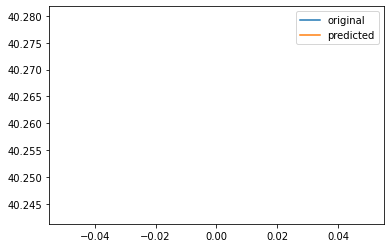

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= "original")
plt.plot(x_ax, ypred, label= "predicted")
plt.legend()
plt.show()
    

In [ ]:
RealDataBL = dataset3[-2]
Prediction = ypred
RealDataLast = dataset3[-1]

PredUp = -1
PredDown = -2
RealUp= -3
RealDown = -4
# Checking if prediction showed price going up or down

if Prediction > RealDataBL:
    PredUp = 1
    
if Prediction < RealDataBL:
    PredDown = 0
    
# Checking if price has actually gone up or down 
    
if RealDataLast > RealDataBL:
    RealUp = 1

if RealDataLast < RealDataBL:
    RealDown = 0
    
if PredUp == RealUp:
    print("correct prediction: price is going up")
    Result = 1
    
if PredDown == RealDown:
    print("correct prediction: price is going down")
    Result = 2
    
if PredUp == 1 and RealDown == 0:
    print("INcorrect prediction")
    Result = 3
    
if PredDown == 0 and RealUp == 1:
    print("INcorrect prediction")
    Result = 4

print('ACTUAL LAST Datapoint',RealDataLast)
print('DAY BEFORE', RealDataBL)
#--------------------------------------------------------
print('PREDICTION', Prediction)



    

correct prediction: price is going down
ACTUAL LAST Datapoint [40.27993393]
DAY BEFORE [41.61140442]
PREDICTION [40.243126]
